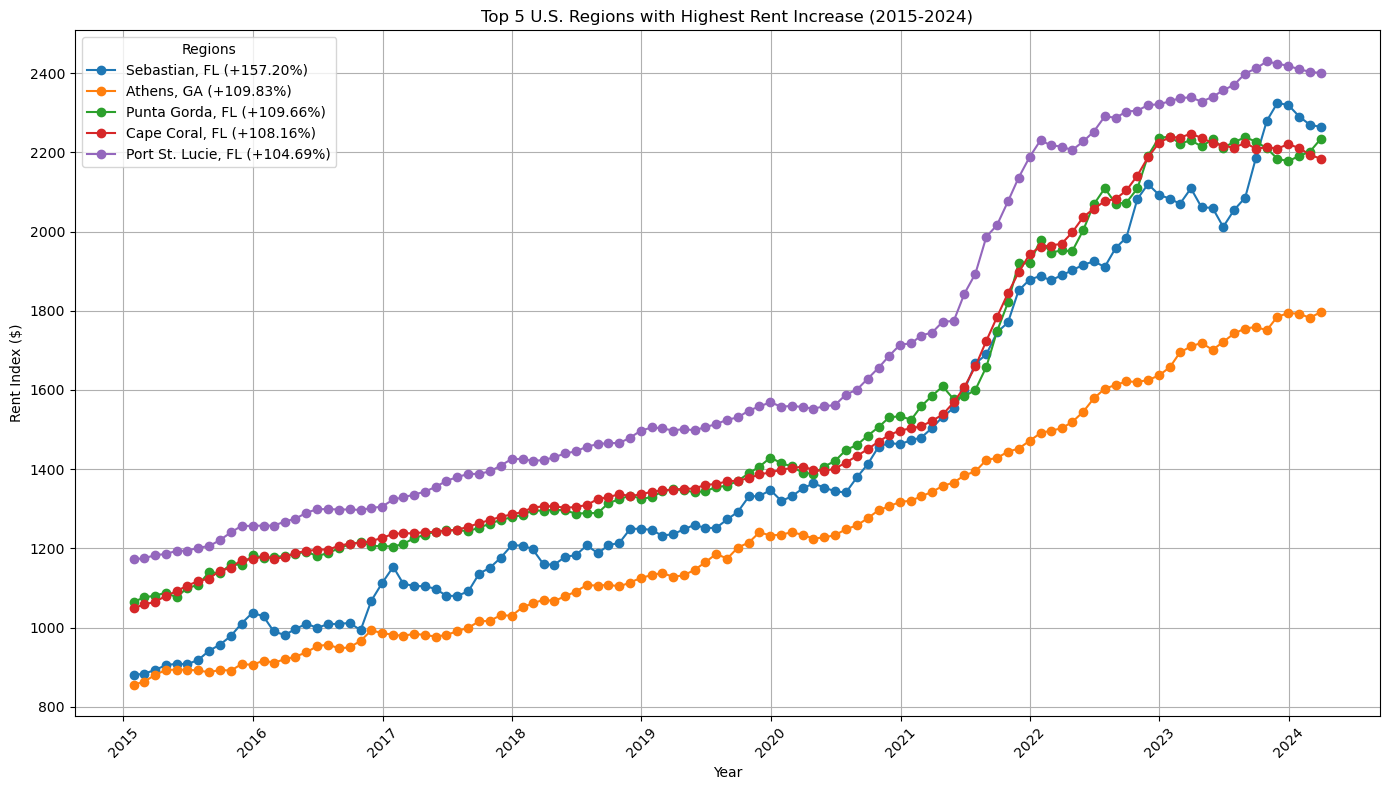

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\Metro_zori_uc_sfrcondomfr_sm_month.csv"
data = pd.read_csv(data_path)

# Convert date columns to datetime and melt the dataframe
data_long = data.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], 
                      var_name='Date', value_name='Rent')
data_long['Date'] = pd.to_datetime(data_long['Date'])

# Extract the first and last date columns for analysis
first_date_col = data.columns[5]  # Assuming the first rent data starts from the 6th column (index 5)
last_date_col = data.columns[-1]  # The last column with rent data

# Calculate the percentage increase from the first to the last date
data['RentIncrease'] = ((data[last_date_col] - data[first_date_col]) / data[first_date_col]) * 100

# Select the top 5 regions with the highest rent increase
top_regions = data.nlargest(5, 'RentIncrease')

# Check for the number of top regions in Florida
florida_count = top_regions[top_regions['StateName'] == 'FL'].shape[0]

# Filter data for top 5 regions
top_data = data_long[data_long['RegionName'].isin(top_regions['RegionName'])]

# Plotting the rental trend over time for top 5 regions
plt.figure(figsize=(14, 8))
for _, region in top_regions.iterrows():
    region_data = top_data[top_data['RegionName'] == region['RegionName']]
    plt.plot(region_data['Date'], region_data['Rent'], marker='o', linestyle='-', label=f"{region['RegionName']} (+{region['RentIncrease']:.2f}%)")

plt.title('Top 5 U.S. Regions with Highest Rent Increase (2015-2024)'.format(florida_count))
plt.xlabel('Year')
plt.ylabel('Rent Index ($)')
plt.legend(title="Regions")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
